#

# Computational Biology

#### Recommended Prerequisites:

*   2 semesters of Calculus, Biology, & Chemistry
*   Basic programming

This notebook contains a collection of simulations exploring some types of dynamical systems found in biology. It walks through derivations of the mathematical models, example code implementations, and discussions of results. Currently, there are 7 sections:

1.   Population Dynamics
2.   Genetic Mutations
3.   Interspecific Competition
4.   Predator-Prey Dynamics
5.   Biochemical Reactions
6.   Biomagnification
7.   Epidemiology

# Population Dynamics

## Exponential Growth

Imagine placing a single bacterium in a Petri dish with plenty of nutrients. Bacteria reproduce asexually, with each "parent" cell dividing into two "child" cells in each "birth" (mitosis) event. Let $N$ denote the number of bacteria in the culture, with $N_{0}=1$ being the initial value, and $t$ denote the time (in minutes) after the first bacterium is placed. If each bacterium divides once every minute, then the population at time $t$, as a function $N(t)$, increases by $N$ every minute. Thus, the rate of change $\frac{\Delta N}{\Delta t}$ is <i>directly proportional</i> to the population.

$$\frac{\Delta N}{\Delta t} = N$$

If we check the population over 10 regular time intervals $\Delta t = 1.0 \; \text{hr}$, what will we see?

In [184]:
# simulate bacterial growth
def grow(N0, dt, nsteps):
    t = 0
    time = [t]
    N = N0
    population = [N]
    for i in range(nsteps):
        dN = N * dt
        N += dN
        t += dt
        population.append(N)
        time.append(t)
    return time, population

N0 = 1 # individual
dt = 1.0 # hr
nsteps = 10 # hrs

time, population = grow(N0, dt, nsteps)

print(time)
print(population)

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0]


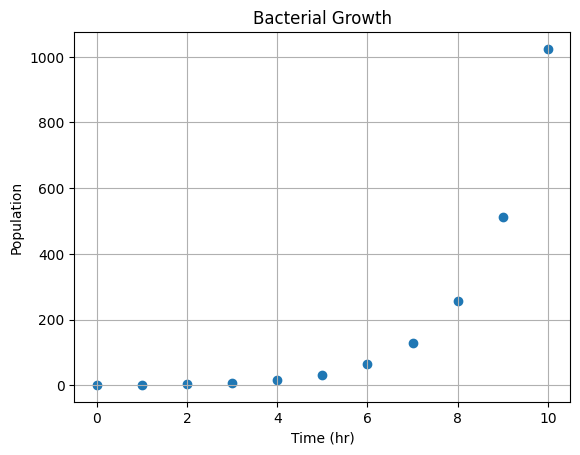

In [185]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(time, population)
plt.title("Bacterial Growth")
plt.ylabel("Population")
plt.xlabel("Time (hr)")
plt.grid()
plt.show()

What does this pattern look like? An exponential function with base 2.

$$N(t) = N_{0} \cdot 2^{t}$$

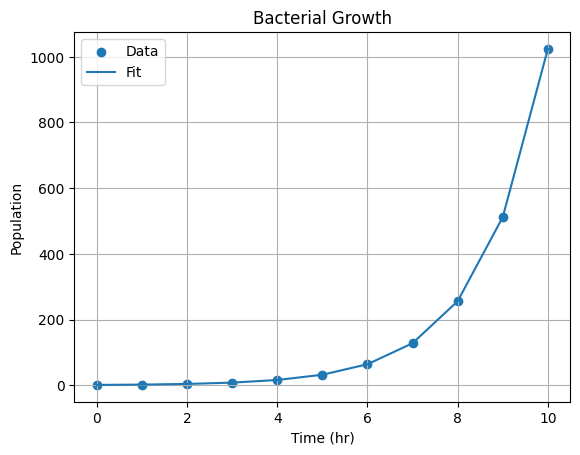

In [186]:
fit = [N0 * 2**t for t in time]

plt.figure()
plt.scatter(time, population, label="Data")
plt.plot(time, fit, label="Fit")
plt.title("Bacterial Growth")
plt.ylabel("Population")
plt.xlabel("Time (hr)")
plt.legend()
plt.grid()
plt.show()

## Euler's Method

What if we make the time interval smaller?

Let $dt$ approach zero, but let the whole observation period remain 10 minutes.

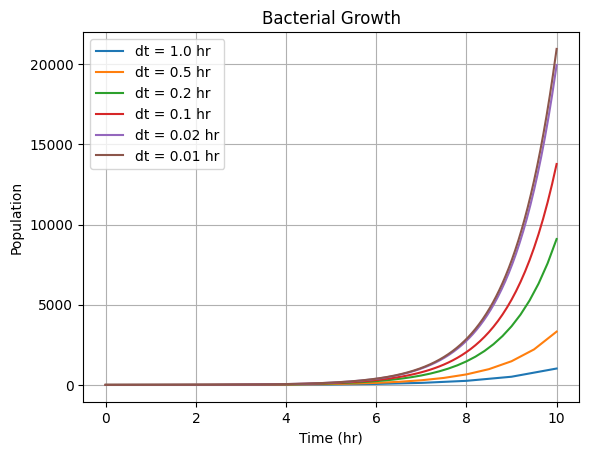

In [187]:
T = 10 # total time in hours

nsteps = [10, 20, 50, 100, 500, 1000]

plt.figure()
for n in nsteps:
    dt = T / n
    time, population = grow(N0, dt, n)
    plt.plot(time, population, label="dt = " + str(dt) + " hr")

plt.title("Bacterial Growth")
plt.ylabel("Population")
plt.xlabel("Time (hr)")
plt.legend()
plt.grid()
plt.show()

Why does the final population size increase as $dt \to 0$?

Consider the definition of the derivative:

$$N'(t) = \lim \limits_{dt \to 0} \frac{N(t + dt) - N(t)}{dt}$$

Then, we can write our differential equation like this:

$$\frac{dN}{dt} = N(t)$$

And rearranging to solve, we get:

$$dN = N(t) \cdot dt$$

$$\frac{1}{N(t)} dN = dt$$

$$\int_{N_{0}}^{N} \frac{1}{N}dN = \int_{0}^{t} dt$$

$$ln(N) - ln(N_{0}) = t$$

$$ln(\frac{N}{N_{0}}) = t$$

$$N(t) = N_{0} \cdot e^{t}$$

The actual growth dynamics, in the continuum approximation, follow a pure exponential function.

If the birth rate $b$ is different from 1 birth per hour, then:

$$\frac{dN}{dt} = b \cdot N$$

$$N(t) = N_{0} \cdot e^{bt}$$

## Birth and Death

In addition to reproducing, organisms die. If individuals in a population die at a constant rate $d$, then the growth dynamics follow the same exponential form, except the proportionality constant becomes $(b - d)$.

$$\frac{dN}{dt} = b \cdot N - d \cdot N = (b - d)N$$

Thus, if the death rate is higher than the birth rate, the population will <i>decay</i> exponentially instead of growing.

If the birth rate and death rate are equal, then one individual will die every time another is born, and the population will remain at a fixed, constant size.

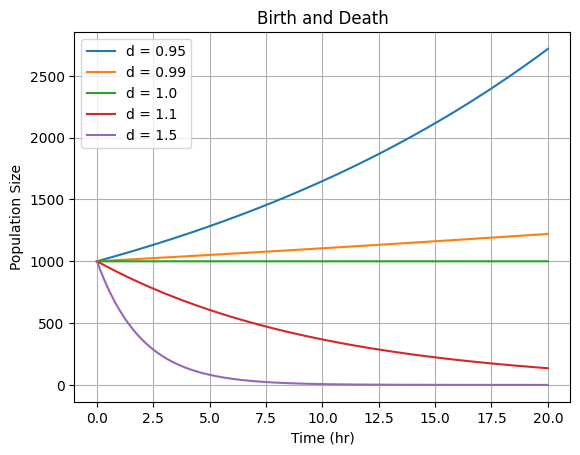

In [188]:
b = 1.0

def growdecay(N0, b, d, dt, T):
    nsteps = int(T / dt)
    t = 0
    N = N0
    population = [N]
    time = [t]
    for i in range(nsteps):
        dNdt = (b - d)*N
        N += dNdt * dt
        population.append(N)
        t += dt
        time.append(t)
    return time, population

plt.figure()

for d in [0.95, 0.99, 1.0, 1.1, 1.5]:
    time, population = growdecay(1000, b, d, dt, 2*T)
    plt.plot(time, population, label=f"d = {d}")

plt.xlabel("Time (hr)")
plt.ylabel("Population Size")
plt.title("Birth and Death")
plt.grid()
plt.legend()
plt.show()

## Logistic Growth

Realistically, habitats can only support a population of limited size. The maximum number of individuals in a growth-limited environment is called the carrying capacity $K$. As the population size approaches the carrying capacity, the growth rate slows down. In the logistic growth model, the growth rate is proportional not only to the current population size, but also to the fraction of the carrying capacity.

$$\frac{dN}{dt} = b N \Bigl( \frac{K - N}{K} \Bigr)$$

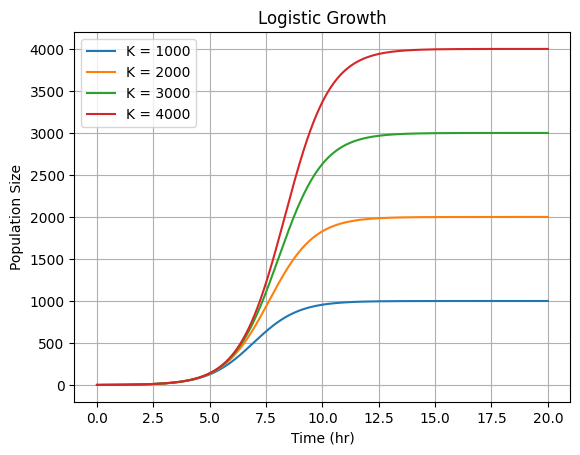

In [189]:
def logistic_growth(N0, b, K, dt, T):
    nsteps = int(T / dt)
    N = N0
    t = 0
    population = [N]
    time = [t]
    for i in range(nsteps):
        dNdt = b * N * (K - N) / K
        N += dNdt * dt
        t += dt
        population.append(N)
        time.append(t)
    return time, population

plt.figure()
for K in [1000, 2000, 3000, 4000]:
    time, population = logistic_growth(1, 1.0, K, dt, 2*T)
    plt.plot(time, population, label=f"K = {K}")
plt.title("Logistic Growth")
plt.ylabel("Population Size")
plt.xlabel("Time (hr)")
plt.legend()
plt.grid()
plt.show()

What if the population starts <i>above</i> its carrying capacity? Because $K-N$ becomes negative, so does the derivative $\frac{dN}{dt}$, and $N$ will tend toward $K$ whether it is smaller or larger.

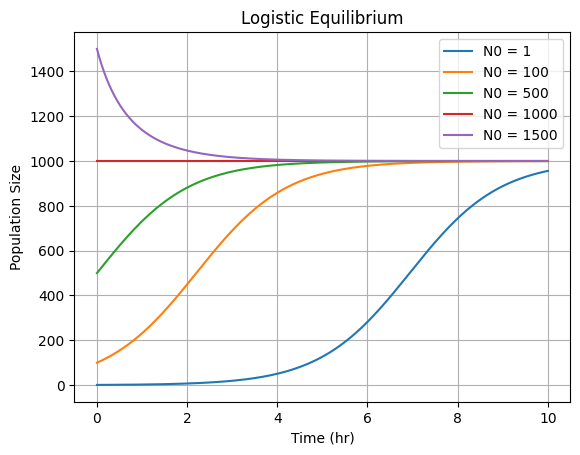

In [190]:
K = 1000

plt.figure()
for N0 in [1, 100, 500, 1000, 1500]:
    time, population = logistic_growth(N0, 1.0, K, dt, T)
    plt.plot(time, population, label=f"N0 = {N0}")
plt.title("Logistic Equilibrium")
plt.ylabel("Population Size")
plt.xlabel("Time (hr)")
plt.legend()
plt.grid()
plt.show()

We say that logistic growth "stabilizes" around the carrying capacity. The state where $N = K$ is an "attractor" state, and the system is "stationary" at that point (it doesn't spontaneously decrease below or increase above $K$). When $N = 0$, the population also doesn't change, because there are no individuals to reproduce; but when $N$ is near $0$, it moves away from $0$, so we call $N = 0$ an unstable or "repellor" state.

## Phase Space

Something that allows us to examine behaviors of systems like this is a "phase portrait", which is generally a plot of a function against one of its derivatives. See that the shape of the logistic growth phase potrait is an upside-down parabola.

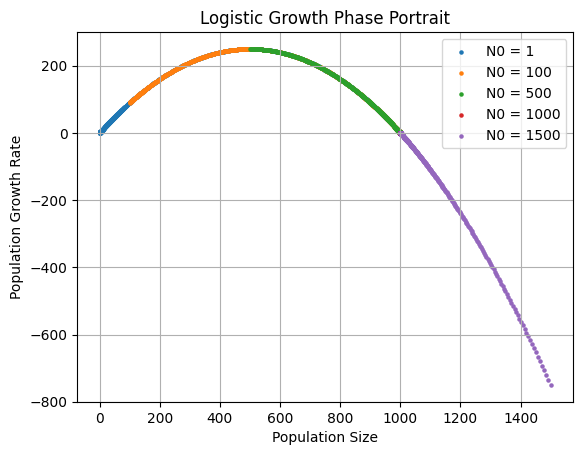

In [191]:
def logistic_growth(N0, b, K, dt, T):
    nsteps = int(T / dt)
    N = N0
    t = 0
    population = [N]
    time = [t]
    growthrate = []
    for i in range(nsteps):
        dNdt = b * N * (K - N) / K
        growthrate.append(dNdt)
        N += dNdt * dt
        t += dt
        population.append(N)
        time.append(t)
    growthrate.append(b * N * (K - N) / K)
    return time, population, growthrate

K = 1000

plt.figure()
for N0 in [1, 100, 500, 1000, 1500]:
    time, population, growthrate = logistic_growth(N0, 1.0, K, dt, T)
    plt.scatter(population, growthrate, label=f"N0 = {N0}", s=5)
plt.title("Logistic Growth Phase Portrait")
plt.ylabel("Population Growth Rate")
plt.xlabel("Population Size")
plt.legend()
plt.grid()
plt.show()

How does this compare to the pure exponential growth (or decay) phase potrait?

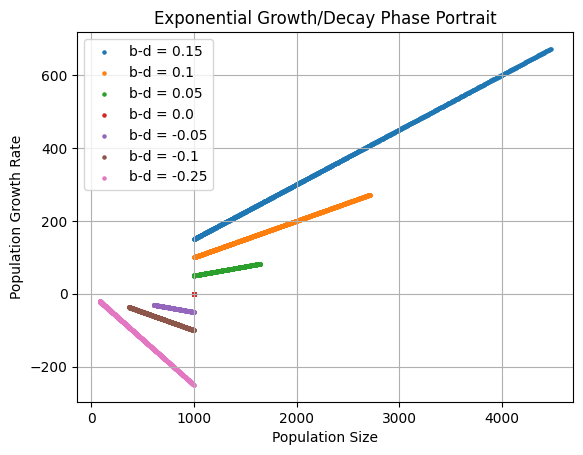

In [192]:
def growdecay(N0, b, d, dt, T):
    nsteps = int(T / dt)
    t = 0
    N = N0
    population = [N]
    time = [t]
    growthrate = []
    for i in range(nsteps):
        dNdt = (b - d)*N
        growthrate.append(dNdt)
        N += dNdt * dt
        population.append(N)
        t += dt
        time.append(t)
    growthrate.append((b - d)*N)
    return time, population, growthrate

plt.figure()

N0 = 1000
b = 1.0

for d in [0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.25]:
    time, population, growthrate = growdecay(N0, b, d, dt, T)
    plt.scatter(population, growthrate, label=f"b-d = {round(b - d,2)}", s=5)

plt.title("Exponential Growth/Decay Phase Portrait")
plt.ylabel("Population Growth Rate")
plt.xlabel("Population Size")
plt.legend()
plt.grid()
plt.show()

And how does the logistic growth phase portrait change for different rate constants?

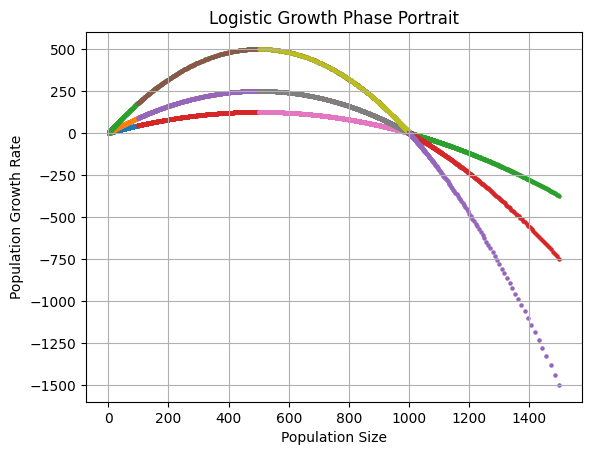

In [193]:
plt.figure()
for N0 in [1, 100, 500, 1000, 1500]:
    for b in [0.5, 1.0, 2.0]:
        time, population, growthrate = logistic_growth(N0, b, K, dt, T)
        plt.scatter(population, growthrate, s=5)
plt.title("Logistic Growth Phase Portrait")
plt.ylabel("Population Growth Rate")
plt.xlabel("Population Size")
plt.grid()
plt.show()

See that while exponential population curves converge to $0$ if the rate constant is negative and diverge to infinity otherwise, all logistic population curves with positive rate constants converge to $K$ from either above ($N > K$) or below ($N < K$). In logistic growth, a negative rate constant is physically meaningless.

# Genetic Mutations

## Gene Fixation

Mutations happen randomly when organisms reproduce because the DNA replication process can be error-prone, resulting in changes in the identities of one or more nucleotides. This can change the functionality of the genes they help encode, and ultimately lead to changes in evolutionary fitness. For example, if a certain "wild-type" (default) genome produces organisms with a birth rate $b_{w} = 1.0$, but a mutation in a certain gene can raise the birth rate of organisms bearing the mutant gene by 25% compared to the wild-type, e.g., $b_{\mu} = 1.25$, the mutant subpopulation will begin to grow more quickly than the rest. If the initial population size is $N = 100$, with $N_{\mu} = 1$ mutant and $N_{w} = 99$ wild-type individuals, and the mutation rate is $\mu = 0.05$ mutations per birth, how quickly will the mutant fraction $f_{\mu} = \frac{N_{\mu}}{N}$ of the population increase?

We can model this dynamically with a set of <i>coupled differential equations</i>.

$$N = N_{w} + N_{\mu}$$

$$\frac{dN}{dt} = \frac{dN_{w}}{dt} + \frac{dN_{\mu}}{dt}$$

$$\frac{dN_{\mu}}{dt} = b_{\mu} N_{\mu} + \mu b_{w} N_{w}$$

$$\frac{dN_{w}}{dt} = (1 - \mu) b_{w} N_{w}$$

Therefore:

$$N_{w}(t) = N_{w}(0) e^{(1 - \mu) b_{w} t}$$

$$\frac{dN_{\mu}}{dt} = b_{\mu} N_{\mu} + \mu b_{w} N_{w}(0) e^{(1 - \mu) b_{w} t}$$

For an analytical solution, we need an integrating factor $\rho(t)$.

$$\rho(t) = e^{\int -b_{\mu} dt} = e^{-b_{\mu} t}$$

$$\rho(t) \cdot \frac{dN_{\mu}}{dt} = \rho(t) \cdot \Bigl[ b_{\mu} N_{\mu} + \mu b_{w} N_{w}(0) e^{(1 - \mu) b_{w} t} \Bigr]$$

$$e^{-b_{\mu} t} \frac{dN_{\mu}}{dt} - e^{-b_{\mu} t} b_{\mu}N_{\mu} = \mu b_{w} N_{w}(0) e^{[(1 - \mu) b_{w} - b_{\mu}] t}$$

Note that the left side is the derivative of a product:

$$e^{-b_{\mu} t} \frac{dN_{\mu}}{dt} - e^{-b_{\mu} t} b_{\mu}N_{\mu} = \frac{d}{dt} \Bigl[ e^{-b_{\mu}t} N_{\mu} \Bigr]$$

Now integrate both sides with respect to $t$:

$$e^{-b_{\mu}t} N_{\mu} = \int_{0}^{t} \mu b_{w} N_{w}(0) e^{[(1 - \mu) b_{w} - b_{\mu}] t} dt$$

$$e^{-b_{\mu}t} N_{\mu} = \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{[(1 - \mu) b_{w} - b_{\mu}] t} + C_{2}$$

$$N_{\mu}(t) = \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{(1 - \mu) b_{w} t} + C_{2} e^{b_{\mu}t}$$

Where $C_{2}$ is the constant of integration, which we can obtain by applying the initial condition value of $N_{\mu}(0)$:

$$N_{\mu}(0) - \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{(1 - \mu) b_{w} \cdot 0} = C_{2} e^{b_{\mu} \cdot 0}$$

$$C_{2} = N_{\mu}(0) - \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}$$

So the full analytical solution, while unwieldy, is the following:

$$N_{\mu}(t) = \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{(1 - \mu) b_{w} t} + \Bigl[ N_{\mu}(0) - \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}} \Bigr] e^{b_{\mu}t}$$

Even more unwieldy is the mutant fraction $f_{\mu}(t)$:

$$f_{\mu}(t) = \frac{N_{\mu}(t)}{N_{\mu}(t) + N_{w}(t)} = \frac{\frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{(1 - \mu) b_{w} t} + \Bigl[ N_{\mu}(0) - \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}} \Bigr] e^{b_{\mu}t}}{\frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}}  e^{(1 - \mu) b_{w} t} + \Bigl[ N_{\mu}(0) - \frac{\mu b_{w} N_{w}(0)}{(1 - \mu) b_{w} - b_{\mu}} \Bigr] e^{b_{\mu}t} + N_{w}(0) e^{(1 - \mu) b_{w} t}}$$

This can be simplified somewhat, but here we have a situation in which a numerical solution is clearly a cleaner approach.

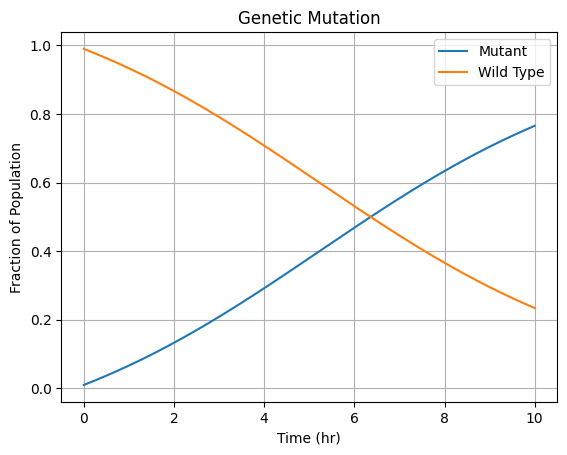

In [194]:
mu = 0.05 # mutations per birth
N0 = 100
Nmu = 1
bw = 1.0 # births per hour
bmu = 1.25 # births per hour
dt = 0.01 # hours
T = 10 # hours

def grow_mutants(N0, Nmu, mu, bw, bmu, dt, T):
    nsteps = int(T / dt)
    t = 0
    N = N0
    Nw = N - Nmu
    time = [t]
    fmu = [Nmu / N]
    for i in range(nsteps):
        t += dt
        time.append(t)
        dNwdt = (1 - mu) * bw * Nw
        dNmudt = bmu * Nmu + mu * bw * Nw
        Nw += dNwdt * dt
        Nmu += dNmudt * dt
        N = Nw + Nmu
        fmu.append(Nmu / N)
    return time, fmu

time, fmu = grow_mutants(N0, Nmu, mu, bw, bmu, dt, T)

plt.figure()
plt.plot(time, fmu, label="Mutant")
plt.plot(time, [1 - f for f in fmu], label="Wild Type")
plt.ylabel("Fraction of Population")
plt.xlabel("Time (hr)")
plt.title("Genetic Mutation")
plt.grid()
plt.legend()
plt.show()

## Relative Fitness

What if we vary the relative fitness of the mutation?

Say the birth rate becomes only 1.1, or larger, like 1.5 or even 2.0. How will this change the result? What if the mutation is <i>dis</i>advantageous, and the birth rate is actually reduced?

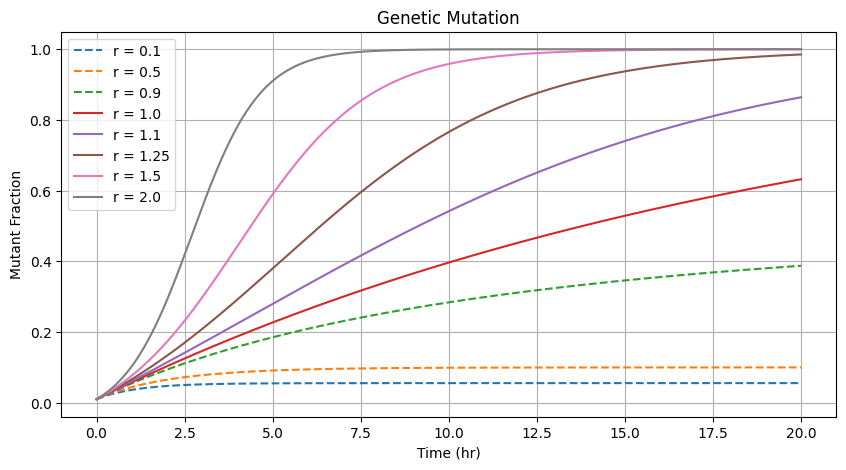

In [195]:
bmu_vals = [0.1, 0.5, 0.9, 1.0, 1.1, 1.25, 1.5, 2.0]

plt.figure(figsize=(10, 5))
for bmu in bmu_vals:
    time, fmu = grow_mutants(N0, Nmu, mu, bw, bmu, dt, T*2)
    ls = "--" if bmu < 1.0 else "-"
    plt.plot(time, fmu, label=f"r = {bmu}", ls=ls)

plt.ylabel("Mutant Fraction")
plt.xlabel("Time (hr)")
plt.title("Genetic Mutation")
plt.legend()
plt.grid()
plt.show()

Because the mutation is a one-way transition, even a neutral mutation ($b_{\mu} = b_{w}$) can eventually dominate, i.e., become the most common allele in the population. This phenomenon, called "neutral gene fixation", being due to "genetic drift" rather than natural selection led geneticist Mootoo Kimura to propose the neutral theory of evolution, which posits that the majority of genetic diversity is due to random fixation of neutral mutations.

# Interspecific Competition

## Lotka-Volterra Equations

A habitat may have different carrying capacities $K_{i}$ for different species. The presence of one species may also impact the growth rate of another species, either because the two compete for food or because one <i>is</i> food for the other. The Lotka-Volterra equations can model this situation. Consider two species populations $N_{1}$ and $N_{2}$, with constant birth rates $b_{1}$ and $b_{2}$, in a habitat that can support at most $K_{1}$ individuals of species $1$ and $K_{2}$ individuals of species $2$. The competition coefficients $\alpha_{ij}$ quantify how much species $i$ changes in proportion to species $j$.

$$\frac{dN_{1}}{dt} = b_{1}N_{1} \Bigl( \frac{K_{1} - N_{1} - \alpha_{12}N_{2}}{K_{1}} \Bigr)$$

$$\frac{dN_{2}}{dt} = b_{2}N_{2} \Bigl( \frac{K_{2} - N_{2} - \alpha_{21}N_{1}}{K_{2}} \Bigr)$$

This is essentially a pair of coupled logistic growth equations.

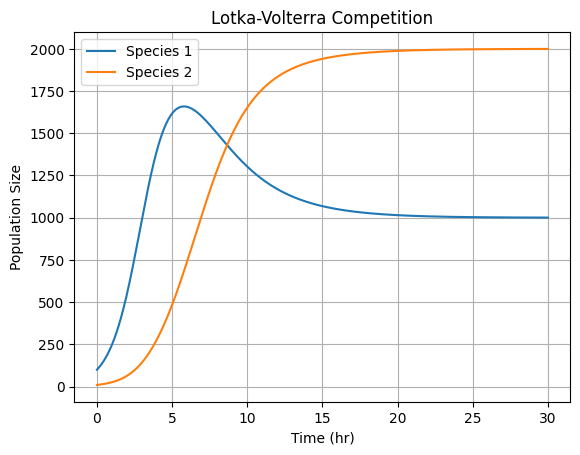

In [196]:
def LV(N1, N2, b1, b2, alpha12, alpha21, K1, K2, dt, T):
    populations = {1: [N1], 2: [N2]}
    growthrates = {1: [], 2: []}
    t = 0
    time = [t]
    nsteps = int(T / dt)
    for i in range(nsteps):
        N1 = populations[1][-1]
        N2 = populations[2][-1]
        dN1dt = b1 * N1 * (K1 - N1 - alpha12 * N2) / K1
        dN2dt = b2 * N2 * (K2 - N2 - alpha21 * N1) / K2
        growthrates[1].append(dN1dt)
        growthrates[2].append(dN2dt)
        N1 += dN1dt * dt
        N2 += dN2dt * dt
        populations[1].append(N1)
        populations[2].append(N2)
        t += dt
        time.append(t)
    dN1dt = b1 * N1 * (K1 - N1 - alpha12 * N2) / K1
    dN2dt = b2 * N2 * (K2 - N2 - alpha21 * N1) / K2
    growthrates[1].append(dN1dt)
    growthrates[2].append(dN2dt)
    return time, populations, growthrates

K1 = 2000
K2 = 2500
b1 = 1.0
b2 = 1.0
alpha12 = 0.5
alpha21 = 0.5
N1 = 100
N2 = 10

time, populations, growthrates = LV(N1, N2, b1, b2, alpha12, alpha21, K1, K2, dt, 3*T)

plt.figure()
for species, population in populations.items():
    plt.plot(time, population, label=f"Species {species}")
plt.xlabel("Time (hr)")
plt.ylabel("Population Size")
plt.title("Lotka-Volterra Competition")
plt.legend()
plt.grid()
plt.show()

## Zero Net Growth Isoclines

See that both populations reach equilibrium sizes together, and despite having equal birth rates and equal effects on each other's growth rate, the species with the greater carrying capacity dominates. The equilibrium sizes are precisely:

$$N_{1} = K_{1} - \alpha_{12}N_{2}$$

$$N_{2} = K_{2} - \alpha_{21}N_{1}$$

These are the equations of the <b>zero net growth isoclines</b> (ZNGI), because at any point $(N_{1}, N_{2})$ along these lines, the corresponding species has zero net growth.

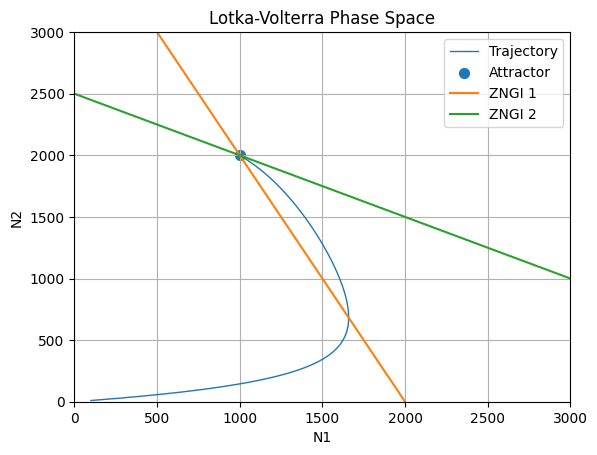

In [197]:
import numpy as np

plt.figure()

pop1, pop2 = list(populations.values())
plt.plot(pop1, pop2, lw=1, label="Trajectory")
plt.scatter([pop1[-1]], [pop2[-1]], s=50, label="Attractor")

N1_space = np.linspace(0, 3000, 1000)
ZNGI1 = (K1 - N1_space)/alpha12
ZNGI2 = K2 - alpha21*N1_space
plt.plot(N1_space, ZNGI1, label="ZNGI 1")
plt.plot(N1_space, ZNGI2, label="ZNGI 2")

plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel("N1")
plt.ylabel("N2")
plt.title("Lotka-Volterra Phase Space")
plt.legend()
plt.grid()
plt.show()

If either species grows beyond its zero net growth isocline (to the right for species 1, or above for species 2), the trajectory will curve back toward it.

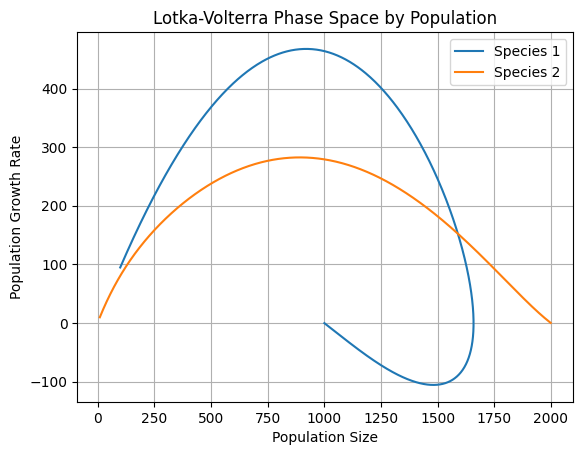

In [198]:
plt.figure()
gr1, gr2 = list(growthrates.values())
plt.plot(pop1, gr1, label="Species 1")
plt.plot(pop2, gr2, label="Species 2")
plt.xlabel("Population Size")
plt.ylabel("Population Growth Rate")
plt.title("Lotka-Volterra Phase Space by Population")
plt.grid()
plt.legend()
plt.show()

## Hawk-Dove Game

Another model of competition between multiple competitors, whether they belong to different species or merely have different strategies within the same population, is the Hawk-Dove game. There are many game theoretic models of competition, as well as cooperation, but this one clearly exemplifies the concept of an evolutionarily stable strategy (ESS) which can still support biodiversity.

In the Hawk-Dove game, there are two (or more) different kinds of interacting competitors: "doves", which agree to share resources (such as food), and "hawks", which fight to claim resources for themselves. If two doves simultaneously encounter a resource with some value $V$, they each gain a utility equal to half the value, $V/2$. If a dove meets a hawk, the hawk will take all of the resource for themself, gaining $V$ while the dove gains $0$. If two hawks interact, they fight, degrading their reward by some cost $C$ due to the violence: $\frac{1}{2}(V - C)$. We can represent all of these outcomes in a payoff matrix:

$$
\begin{array}{c|c|c|}
P1 \backslash P2&\text{Hawk}&\text{Dove}\\
\hline
\text{Hawk}&\frac{1}{2}(V - C) \;\backslash\; \frac{1}{2}(V - C)&V \;\backslash\; 0\\
\hline
\text{Dove}&0 \;\backslash\; V&\frac{1}{2}V\;\backslash\;\frac{1}{2}V
\end{array}
$$

We can implement this game as an evolutionary rule to see which strategy dominates in a population by using the replicator equation:

$$N(t) = N_{hawk}(t) + N_{dove}(t)$$

$$1 = \frac{N_{hawk}(t)}{N(t)} + \frac{N_{hawk}(t)}{N(t)}$$

$$1 = p_{hawk}(t) + p_{dove}(t)$$

$$\frac{dp_{hawk}}{dt} = p_{hawk} \Bigl( f_{hawk} - \bar{f} \Bigr)$$

$$\frac{dp_{dove}}{dt} = p_{dove} \Bigl( f_{dove} - \bar{f} \Bigr)$$

Where $f_{hawk}$ and $f_{dove}$ are the respective instantaneous fitnesses of the strategies:

$$f_{hawk} = A_{hawk|hawk}p_{hawk} + A_{hawk|dove}p_{dove}$$

$$f_{dove} = A_{dove|hawk}p_{hawk} + A_{dove|dove}p_{dove}$$

And $\bar{f}$ is the average fitness:

$$\bar{f} = f_{hawk}p_{hawk} + f_{dove}p_{dove}$$

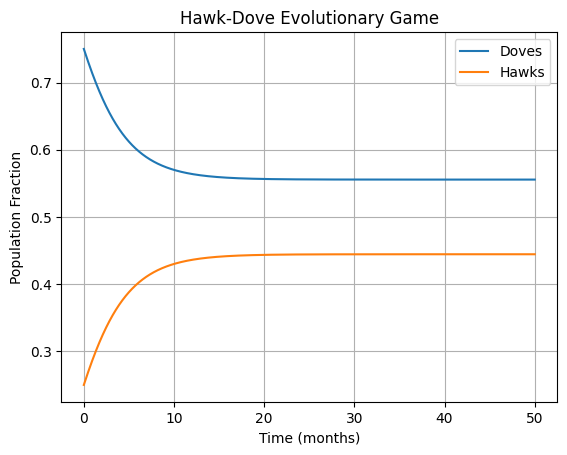

In [199]:
V = 1.0
C = 0.25
PAYOFFS = {
    ("hawk", "hawk"): ( (V - C) / 2, (V - C) / 2 ),
    ("hawk", "dove"): ( V, 0 ),
    ("dove", "hawk"): ( 0, V ),
    ("dove", "dove"): ( V / 2, V / 2 )
}

def hawkdove(N_hawks, N_doves, payoffs, dt, T):
    nsteps = int(T / dt)
    t = 0
    times = [t]
    N = N_hawks + N_doves
    p_hawk = N_hawks / N
    p_dove = N_doves / N
    A_hh_hawk, A_hh_dove = payoffs[("hawk", "hawk")]
    A_hd_hawk, A_hd_dove = payoffs[("hawk", "dove")]
    A_dh_hawk, A_dh_dove = payoffs[("dove", "hawk")]
    A_dd_hawk, A_dd_dove = payoffs[("dove", "dove")]
    populations = {"hawk": [p_hawk], "dove": [p_dove]}
    growthrates = {"hawk": [], "dove": []}
    for i in range(nsteps):
        f_hawk = A_hh_hawk * p_hawk + A_hd_hawk * p_dove
        f_dove = A_dh_dove * p_hawk + A_dd_dove * p_dove
        f_avg = f_hawk * p_hawk + f_dove * p_dove
        dphawkdt = p_hawk * (f_hawk - f_avg)
        dpdovedt = p_dove * (f_dove - f_avg)
        p_hawk += dphawkdt * dt
        p_dove += dpdovedt * dt
        populations["hawk"].append(p_hawk)
        populations["dove"].append(p_dove)
        t += dt
        times.append(t)
        growthrates["hawk"].append(dphawkdt)
        growthrates["dove"].append(dpdovedt)
    growthrates["hawk"].append(p_hawk * (f_hawk - f_avg))
    growthrates["dove"].append(p_dove * (f_dove - f_avg))
    return times, populations["hawk"], populations["dove"], growthrates["hawk"], growthrates["dove"]

N_hawks = 25
N_doves = 75

plt.figure()
times, hawks, doves, dhawksdt, ddovesdt = hawkdove(N_hawks, N_doves, PAYOFFS, dt, 5*T)
plt.plot(times, doves, label="Doves")
plt.plot(times, hawks, label="Hawks")
plt.xlabel("Time (months)")
plt.ylabel("Population Fraction")
plt.title("Hawk-Dove Evolutionary Game")
plt.grid()
plt.legend()
plt.show()

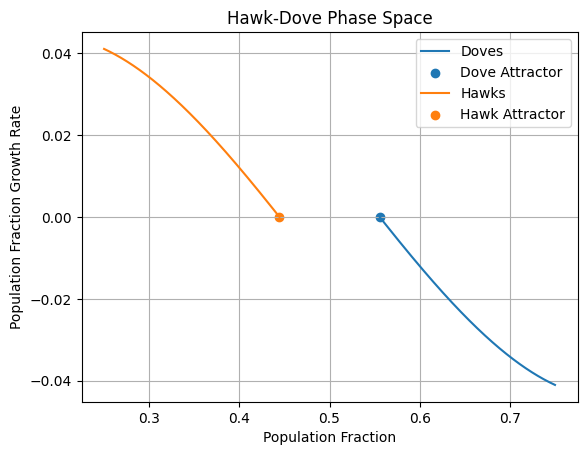

In [200]:
plt.figure()
plt.plot(doves, ddovesdt, label="Doves")
plt.scatter([doves[-1]], [ddovesdt[-1]], label="Dove Attractor")
plt.plot(hawks, dhawksdt, label="Hawks")
plt.scatter([hawks[-1]], [dhawksdt[-1]], label="Hawk Attractor")
plt.grid()
plt.xlabel("Population Fraction")
plt.ylabel("Population Fraction Growth Rate")
plt.title("Hawk-Dove Phase Space")
plt.legend()
plt.show()

Once the growth rate is $0$ for all competitor populations, the distribution of population sizes is considered to be in an "evolutionary stable state".

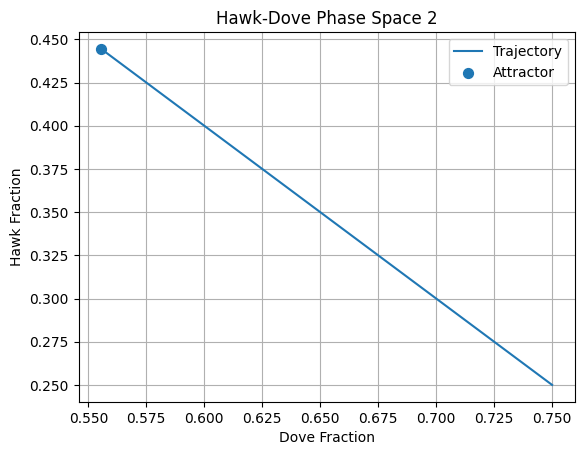

In [201]:
plt.figure()
plt.plot(doves, hawks, label="Trajectory")
plt.scatter([doves[-1]], [hawks[-1]], s=50, label="Attractor")
plt.xlabel("Dove Fraction")
plt.ylabel("Hawk Fraction")
plt.title("Hawk-Dove Phase Space 2")
plt.grid()
plt.legend()
plt.show()

## Hawk-Dove-Switch

These results are rather mundane compared to what we saw from the Lotka-Volterra equations. This is because the replicator equations for $n$ species are equivalent to the Lotka-Volterra equations for $n-1$ species. Let's see what happens if we add a third, intermediate strategy to the payoff matrix. One case is a semi-aggressive species that switches between the hawk strategy when encountering a dove or another of its own species and the dove strategy when encountering a hawk.

$$
\begin{array}{c|c|c|c|}
P1 \backslash P2&\text{Hawk}&\text{Switch}&\text{Dove}\\
\hline
\text{Hawk}&\frac{1}{2}(V - C) \;\backslash\; \frac{1}{2}(V - C)&V \;\backslash\; 0&V \;\backslash\; 0\\
\hline
\text{Switch}&0 \;\backslash\; V&\frac{1}{2}(V - C) \;\backslash\; \frac{1}{2}(V - C)&V \;\backslash\; 0 \\
\hline
\text{Dove}&0 \;\backslash\; V&0 \;\backslash\; V&\frac{1}{2}V\;\backslash\;\frac{1}{2}V
\end{array}
$$

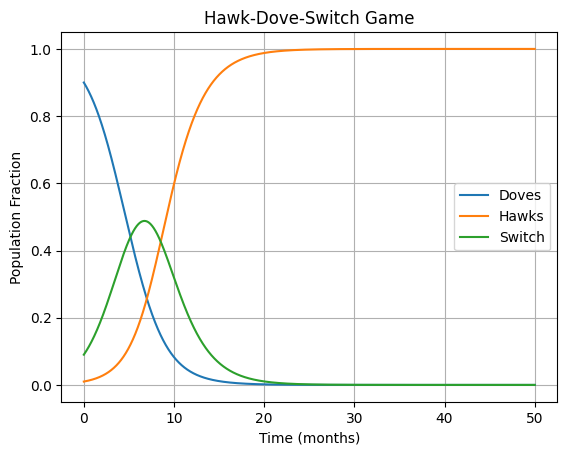

In [219]:
V = 1.0
C = 0.25
PAYOFFS = {
    ("hawk", "hawk"): ( (V - C) / 2, (V - C) / 2 ),
    ("hawk", "switch"): (V, 0),
    ("hawk", "dove"): ( V, 0 ),
    ("switch", "hawk"): (0, V),
    ("switch", "switch"): ( (V - C) / 2, (V - C) / 2 ),
    ("switch", "dove"): (V, 0),
    ("dove", "hawk"): ( 0, V ),
    ("dove", "switch"): (0, V),
    ("dove", "dove"): ( V / 2, V / 2 )
}

def hawkdoveswitch(N_hawks, N_switch, N_doves, payoffs, dt, T):
    nsteps = int(T / dt)
    t = 0
    times = [t]
    N = N_hawks + N_doves + N_switch
    p_hawk = N_hawks / N
    p_dove = N_doves / N
    p_switch = N_switch / N
    populations = {"hawk": [p_hawk], "switch": [p_switch], "dove": [p_dove]}
    growthrates = {"hawk": [], "switch": [], "dove": []}
    for i in range(nsteps):
        f_hawk = payoffs[("hawk", "hawk")][0] * p_hawk + payoffs[("hawk", "switch")][0] * p_switch + payoffs[("hawk", "dove")][0] * p_dove
        f_switch = payoffs[("switch", "hawk")][0] * p_hawk + payoffs[("switch", "switch")][0] * p_switch + payoffs[("switch", "dove")][0] * p_dove
        f_dove = payoffs[("dove", "hawk")][0] * p_hawk + payoffs[("dove", "switch")][0] * p_switch + payoffs[("dove", "dove")][0] * p_dove
        f_avg = f_hawk * p_hawk + f_switch * p_switch + f_dove * p_dove
        dphawkdt = p_hawk * (f_hawk - f_avg)
        dpswitchdt = p_switch * (f_switch - f_avg)
        dpdovedt = p_dove * (f_dove - f_avg)
        p_hawk += dphawkdt * dt
        p_switch += dpswitchdt * dt
        p_dove += dpdovedt * dt
        populations["hawk"].append(p_hawk)
        populations["switch"].append(p_switch)
        populations["dove"].append(p_dove)
        t += dt
        times.append(t)
        growthrates["hawk"].append(dphawkdt)
        growthrates["switch"].append(dpswitchdt)
        growthrates["dove"].append(dpdovedt)
    growthrates["hawk"].append(p_hawk * (f_hawk - f_avg))
    growthrates["switch"].append(p_switch * (f_switch - f_avg))
    growthrates["dove"].append(p_dove * (f_dove - f_avg))
    return times, populations, growthrates

N_hawks = 1
N_switch = 9
N_doves = 90

plt.figure()
times, populations, growthrates = hawkdoveswitch(N_hawks, N_switch, N_doves, PAYOFFS, dt, 5*T)
hawks, switch, doves = list(populations.values())
plt.plot(times, doves, label="Doves")
plt.plot(times, hawks, label="Hawks")
plt.plot(times, switch, label="Switch")
plt.xlabel("Time (months)")
plt.ylabel("Population Fraction")
plt.title("Hawk-Dove-Switch Game")
plt.grid()
plt.legend()
plt.show()

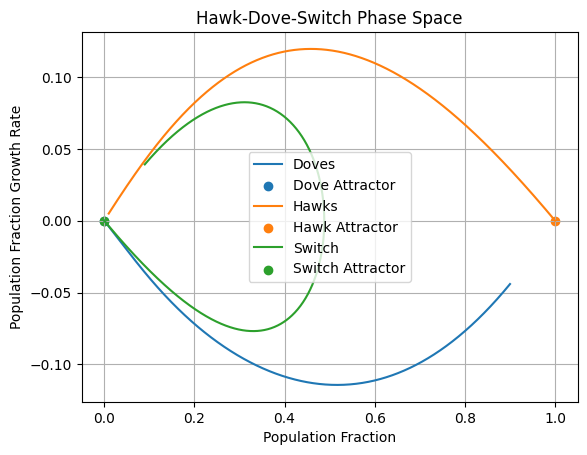

In [203]:
plt.figure()
dhawksdt, dswitchdt, ddovesdt = list(growthrates.values())
plt.plot(doves, ddovesdt, label="Doves")
plt.scatter([doves[-1]], [ddovesdt[-1]], label="Dove Attractor")
plt.plot(hawks, dhawksdt, label="Hawks")
plt.scatter([hawks[-1]], [dhawksdt[-1]], label="Hawk Attractor")
plt.plot(switch, dswitchdt, label="Switch")
plt.scatter([switch[-1]], [dswitchdt[-1]], label="Switch Attractor")
plt.grid()
plt.xlabel("Population Fraction")
plt.ylabel("Population Fraction Growth Rate")
plt.title("Hawk-Dove-Switch Phase Space")
plt.legend()
plt.show()

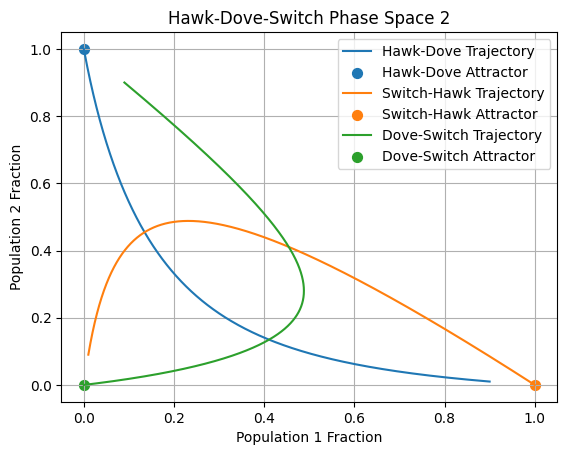

In [204]:
plt.figure()
plt.plot(doves, hawks, label="Hawk-Dove Trajectory")
plt.scatter([doves[-1]], [hawks[-1]], s=50, label="Hawk-Dove Attractor")
plt.plot(hawks, switch, label="Switch-Hawk Trajectory")
plt.scatter([hawks[-1]], [switch[-1]], s=50, label="Switch-Hawk Attractor")
plt.plot(switch, doves, label="Dove-Switch Trajectory")
plt.scatter([switch[-1]], [doves[-1]], s=50, label="Dove-Switch Attractor")
plt.xlabel("Population 1 Fraction")
plt.ylabel("Population 2 Fraction")
plt.title("Hawk-Dove-Switch Phase Space 2")
plt.grid()
plt.legend()
plt.show()

These results are more complex, but the ESS contains only one surviving strategy. In order for the three strategies to co-exist at equilibrium, the cost of fighting must exceed the value: $C > V$. This creates the possibility of a net penalty for aggressor strategists, regulating the populations.

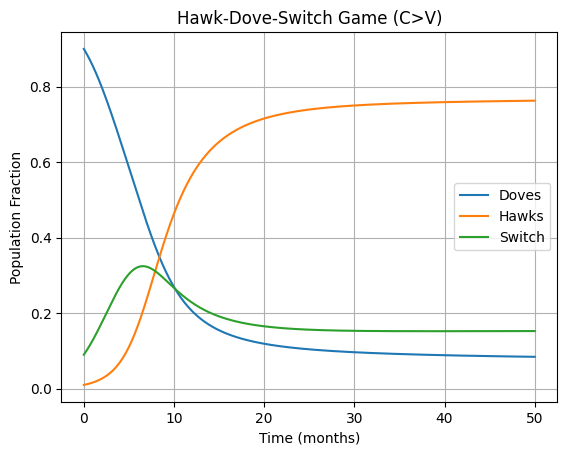

In [220]:
V = 1.0
C = 1.5
PAYOFFS = {
    ("hawk", "hawk"): ( (V - C) / 2, (V - C) / 2 ),
    ("hawk", "switch"): (V, 0),
    ("hawk", "dove"): ( V, 0 ),
    ("switch", "hawk"): (0, V),
    ("switch", "switch"): ( (V - C) / 2, (V - C) / 2 ),
    ("switch", "dove"): (V, 0),
    ("dove", "hawk"): ( 0, V ),
    ("dove", "switch"): (0, V),
    ("dove", "dove"): ( V / 2, V / 2 )
}

plt.figure()
times, populations, growthrates = hawkdoveswitch(N_hawks, N_switch, N_doves, PAYOFFS, dt, 5*T)
hawks, switch, doves = list(populations.values())
plt.plot(times, doves, label="Doves")
plt.plot(times, hawks, label="Hawks")
plt.plot(times, switch, label="Switch")
plt.xlabel("Time (months)")
plt.ylabel("Population Fraction")
plt.title("Hawk-Dove-Switch Game (C>V)")
plt.grid()
plt.legend()
plt.show()

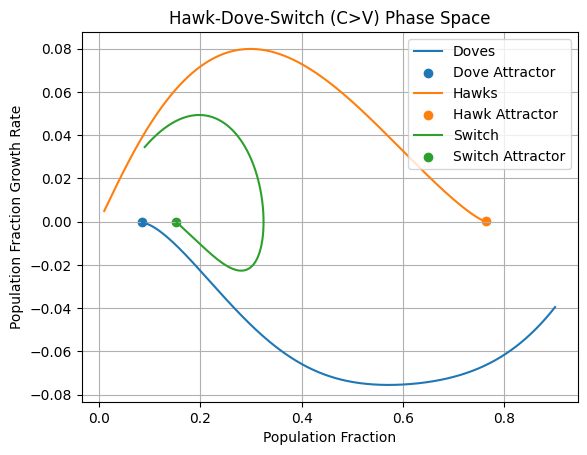

In [221]:
plt.figure()
dhawksdt, dswitchdt, ddovesdt = list(growthrates.values())
plt.plot(doves, ddovesdt, label="Doves")
plt.scatter([doves[-1]], [ddovesdt[-1]], label="Dove Attractor")
plt.plot(hawks, dhawksdt, label="Hawks")
plt.scatter([hawks[-1]], [dhawksdt[-1]], label="Hawk Attractor")
plt.plot(switch, dswitchdt, label="Switch")
plt.scatter([switch[-1]], [dswitchdt[-1]], label="Switch Attractor")
plt.grid()
plt.xlabel("Population Fraction")
plt.ylabel("Population Fraction Growth Rate")
plt.title("Hawk-Dove-Switch (C>V) Phase Space")
plt.legend()
plt.show()

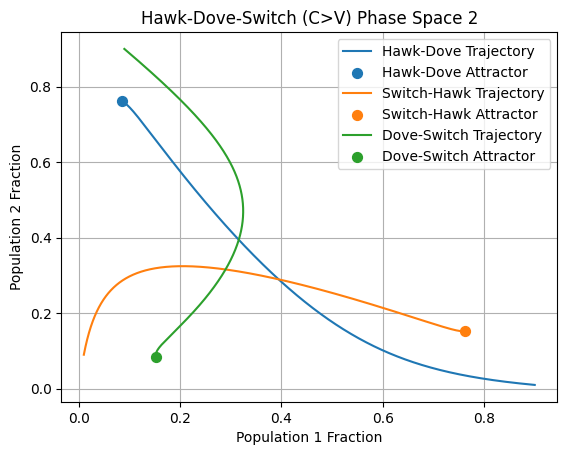

In [222]:
plt.figure()
plt.plot(doves, hawks, label="Hawk-Dove Trajectory")
plt.scatter([doves[-1]], [hawks[-1]], s=50, label="Hawk-Dove Attractor")
plt.plot(hawks, switch, label="Switch-Hawk Trajectory")
plt.scatter([hawks[-1]], [switch[-1]], s=50, label="Switch-Hawk Attractor")
plt.plot(switch, doves, label="Dove-Switch Trajectory")
plt.scatter([switch[-1]], [doves[-1]], s=50, label="Dove-Switch Attractor")
plt.xlabel("Population 1 Fraction")
plt.ylabel("Population 2 Fraction")
plt.title("Hawk-Dove-Switch (C>V) Phase Space 2")
plt.grid()
plt.legend()
plt.show()

# Predator-Prey Dynamics

## Population Cycling

In a food web, there are producer species (like plants) and consumer species. Some consumers are "first-order" (C1), in that they eat only producers (as is the case for herbivores like rabbits); second-order and higher-order consumers (C2, C3, ...) eat other consumers. There are also more complex ecological roles, like scavengers and parasites, but ultimately all species interactions can be modelled abstractly with a matrix of coefficients. Net birth rate is the coefficient of proportionality between a population's growth rate and its size; competition coefficients set the growth rate in direct proportion to the sizes of other populations; but predation coefficients $p_{ij}$ govern the effects of predation interactions, which are proportional to both the predator <i>and</i> prey population sizes.

Consider a two-species system where species 1 is the prey and species 2 is the predator. The predation coefficient $p_{12}$ measures the number of species 1 individuals lost per unit time due to predation by $N_{2}$ species 2 individuals. Species 1 is a first-order consumer (C1) species, so it grows exponentially at a constant rate $b_{1}$ in the regime well below its carrying capacity as long as the habitat is full of plants. Species 2 is a secondary consumer (C2) and depends on the species 1 population to survive, dying exponentially at a constant rate $d_{2}$ due to starvation if there is not enough food.

$$\frac{dN_{1}}{dt} = b_{1}N_{1} - p_{12}N_{1}N_{2}$$

$$\frac{dN_{2}}{dt} = p_{12}N_{1}N_{2} - d_{2}N_{2}$$

You may recognize these as the Lotka-Volterra equations from before in a slightly different form! Here, the birth and death rates of each individual species are decoupled from the interaction rates between them.

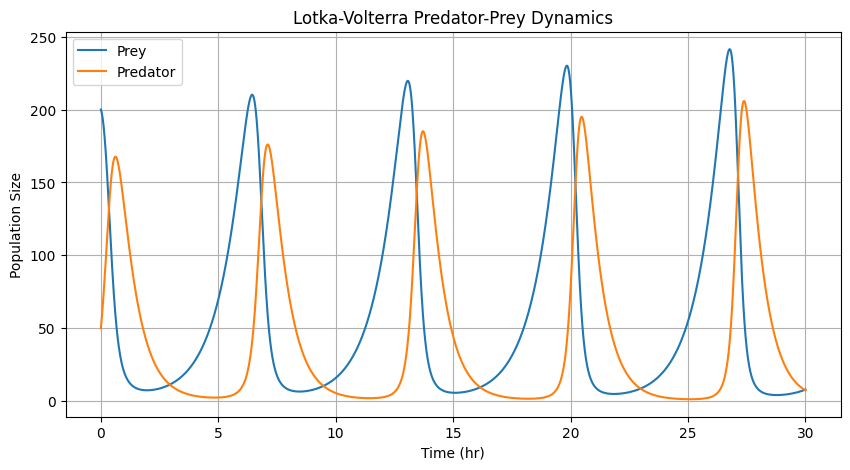

In [208]:
N1 = 200
b1 = 1.0
N2 = 50
d2 = 1.5
p12 = 0.025

def PP(N1, N2, b1, d2, p12, dt, T):
    nsteps = int(T / dt)
    populations = {1: [N1], 2: [N2]}
    growthrates = {1: [], 2: []}
    t = 0
    time = [t]
    for i in range(nsteps):
        dN1dt = b1*N1 - p12*N1*N2
        dN2dt = p12*N1*N2 - d2*N2
        growthrates[1].append(dN1dt)
        growthrates[2].append(dN2dt)
        N1 += dN1dt * dt
        N2 += dN2dt * dt
        populations[1].append(N1)
        populations[2].append(N2)
        t += dt
        time.append(t)
    growthrates[1].append(b1*N1 - p12*N1*N2)
    growthrates[2].append(p12*N1*N2 - d2*N2)
    return time, populations, growthrates

plt.figure(figsize=(10,5))
time, populations, growthrates = PP(N1, N2, b1, d2, p12, dt, 3*T)
pop1, pop2 = list(populations.values())
plt.plot(time, pop1, label="Prey")
plt.plot(time, pop2, label="Predator")
plt.xlabel("Time (hr)")
plt.ylabel("Population Size")
plt.title("Lotka-Volterra Predator-Prey Dynamics")
plt.legend()
plt.grid()
plt.show()

The populations cycle! What does the phase space look like?

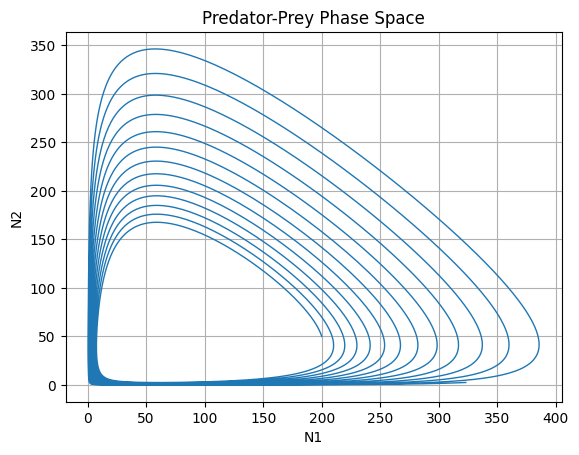

In [209]:
time, populations, growthrates = PP(N1, N2, b1, d2, p12, dt, 10*T)
pop1, pop2 = list(populations.values())

plt.figure()
plt.plot(pop1, pop2, lw=1)
plt.xlabel("N1")
plt.ylabel("N2")
plt.title("Predator-Prey Phase Space")
plt.grid()
plt.show()

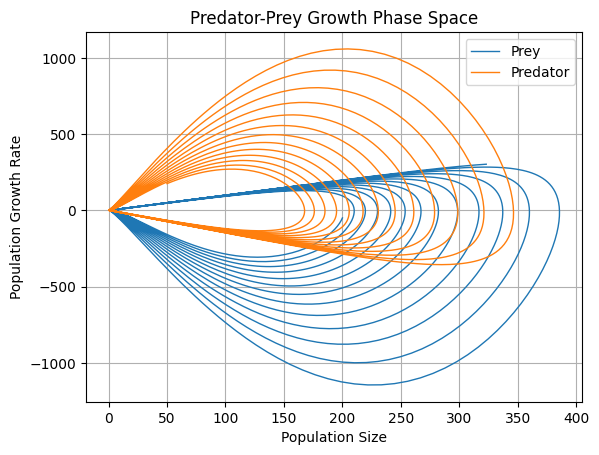

In [210]:
time, populations, growthrates = PP(N1, N2, b1, d2, p12, dt, 10*T)
pop1, pop2 = list(populations.values())
gr1, gr2 = list(growthrates.values())

plt.figure()
plt.plot(pop1, gr1, lw=1, label="Prey")
plt.plot(pop2, gr2, lw=1, label="Predator")
plt.xlabel("Population Size")
plt.ylabel("Population Growth Rate")
plt.title("Predator-Prey Growth Phase Space")
plt.legend()
plt.grid()
plt.show()

# Biochemical Reactions

## First-Order Kinetics

What is happening on the molecular scale when an organism consumes food? Macroscopically, digestion can have a mechanical component, where large chunks of biomass are cut and pulverized by teeth and the gastrointestinal tract; and a chemical component, where molecules called <i>enzymes</i> produced by consumers undergo chemical reactions with consumed biomolecules to make them utilizable by living cells.

### Lactase Hydrolysis

One example is the hydrolysis of the sugar molecule lactose by the enzyme lactase. This is a catabolic reaction which occurs largely in the small intestine, but some humans require additional quantities of manufactured lactase to effectively digest food with high amounts of lactose (like dairy). Lactose is a disaccharide, consisting of the two simple sugar monomers glucose and galactose linked by a glycosidic bond. Glucose is essential to cell functions, so cells produce lactase, which breaks this bond by catalyzing (facilitating) contact with a water molecule that replaces it.

### Mathematical Model

When the local concentration of lactose, $[S]$, is "low" (compared to what, we shall see) and lactase binding sites are plentiful, the hydrolysis reaction follows first-order kinetics, so the reaction rate is directly proportional to $[S]$. Here, lactose is called the "substrate" (S), and lactase is called the "enzyme" (E). Each E-S reaction produces one unit of the "product" (P), glucose (and galactose, which we will ignore for now).

The substrate depletion:

$$\frac{d[S]}{dt} = -k[S]$$

$$[S]_{0} = \text{const}$$

$$[S] = [S]_{0} e^{-kt}$$

And the product formation:

$$\frac{d[P]}{dt} = -\frac{d[S]}{dt} = k[S]$$

$$[P]_{0} = 0$$

$$\int_{[P]_{0}}^{[P]} d[P] = \int_{0}^{t} k [S]_{0} e^{-kt} dt$$

$$[P] = [S]_{0} (1 - e^{-kt})$$

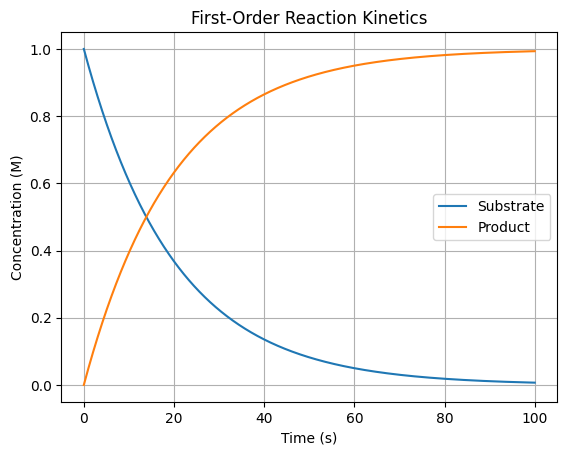

In [211]:
S0 = 1.0 # M, scalable
P0 = 0.0 # M
k = 0.05

def order1kinetics(S, P, k, dt, T):
    nsteps = int(T / dt)
    concS = [S]
    concP = [P]
    t = 0
    time = [t]
    for i in range(nsteps):
        dSdt = -k * S
        dPdt = -dSdt
        S += dSdt * dt
        P += dPdt * dt
        concS.append(S)
        concP.append(P)
        t += dt
        time.append(t)
    return time, concS, concP

plt.figure()
time, concS, concP = order1kinetics(S0, P0, k, dt, 10*T)
plt.plot(time, concS, label="Substrate")
plt.plot(time, concP, label="Product")
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.title("First-Order Reaction Kinetics")
plt.show()

## Michaelis-Menten Kinetics

In reality, this is a multi-step process that depends on both the enzyme and substrate concentrations; the binding of substrate to enzyme into the E-S complex can have a different reaction rate than the catalysis of the E-S complex into enzyme and product, and the E-S complex can also dissociate back into a free enzyme-substrate pair instead of successfully catalyzing the product formation. This leads to the following set of reactions:

$$E + S \xrightarrow{k_{1}} ES \xrightarrow{k_{2}} E + P$$

$$E + S \xleftarrow{k_{-1}} ES \xleftarrow{k_{-2}} E + P$$

For now, $k_{-2}$ is zero, because the product can no longer be used as a substrate.

To model this mathematically, we need the concept of mass balance. This means that the total enzyme concentration and the total substrate concentration must equal the sums of individual molecule concentrations and E-S complex concentrations.

$$[E]_{T} = [E] + [ES]$$

$$[S]_{T} = [S] + [ES]$$

Equivalently, we can write:

$$[E]_{T} - [E] = [ES]$$

If we assume that the E-S complex is in instantaneous chemical equilibrium with the free enzyme and substrate, we have the following, where $K_{diss}$ is the dissociation constant $\frac{k_{-1}}{k_{1}}$.

$$k_{-1}[ES] = k_{1}[E][S]$$

$$K_{diss} = \frac{k_{-1}}{k_{1}} = \frac{[E][S]}{[ES]}$$

After applying mass balance (conservation of enzyme) and performing some algebra, we arrive at the Michaelis-Menten equation.

$$K_{diss} = \frac{([E]_{T} - [ES])[S]}{[ES]}$$

$$K_{diss}[ES] = ([E]_{T} - [ES])[S]$$

$$(K_{diss} + [S])[ES] = [E]_{T}[S]$$

$$[ES] = \frac{[E]_{T} [S]}{K_{diss} + [S]}$$

The rate of product formation is directly proportional to $[ES]$. This rate is also sometimes called the reaction velocity, $V$.

$$\frac{d}{dt}[P] = V = k_{2} [ES] = \frac{k_{2} [E]_{T}[S]}{K_{diss} + [S]}$$

This rate asympotically approaches a maximum value of $V_{max} = k_{2}[E]_{T}$ as $[S]$ becomes large. This effect is called saturation.

We ought to apply the correction to $K_{diss}$ due to the catalytic reaction competing with E-S dissociation, allowing us to write the equation in its standard form.

$$K_{m} = \frac{k_{2} + k_{-1}}{k_{1}}$$

$$V = \frac{V_{max}[S]}{K_{m} + [S]}$$

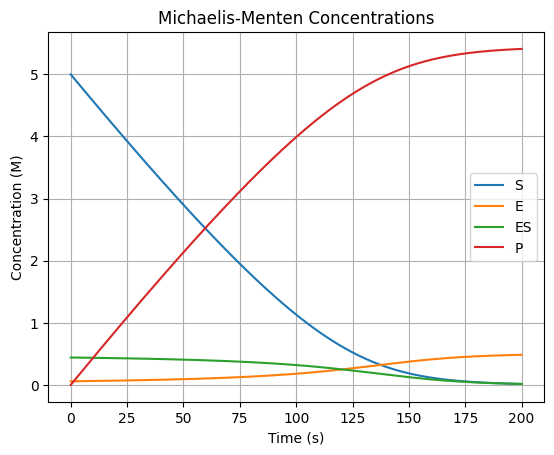

In [212]:
def MM(S, E, ES, P, k1, k1_reverse, k2, dt, T):
    Km = (k2 + k1_reverse)/k1
    Vmax = k2*(E+ES)
    nsteps = int(T / dt)
    concS = [S]
    concE = [E]
    concES = [ES]
    concP = [P]
    t = 0
    time = [t]
    V = [k2*ES]
    for i in range(nsteps):
        dESdt = k1*E*S - (k2 + k1_reverse)*ES
        dPdt = k2*ES
        dSdt = k1_reverse*ES - k1*E*S
        dEdt = -dESdt
        t += dt
        S += dSdt * dt
        E += dEdt * dt
        ES += dESdt * dt
        P += dPdt * dt
        concS.append(S)
        concE.append(E)
        concES.append(ES)
        concP.append(P)
        time.append(t)
        V.append(Vmax*S/(Km + S))
    return time, concS, concE, concES, concP, V

S = 5.0
E = 0.0588
ES = 0.4412
P = 0
k1 = 0.3
k1_rev = 0.1
k2 = 0.1

Vmax = k2*(E+ES)
Km = (k2 + k1_rev)/k1

plt.figure()
time, concS, concE, concES, concP, V = MM(S, E, ES, P, k1, k1_rev, k2, dt, 20*T)
plt.plot(time, concS, label="S")
plt.plot(time, concE, label="E")
plt.plot(time, concES, label="ES")
plt.plot(time, concP, label="P")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (M)")
plt.title("Michaelis-Menten Concentrations")
plt.legend()
plt.grid()
plt.show()

Note that the substrate-to-product process obeys first-order reaction kinetics at low substrate concentrations (relative to the Michaelis constant $K_{m}$), but then transitions to zeroth-order kinetics, i.e., approaching a constant reaction rate $V_{max}$ at higher substrate concentrations. This is visible on the concentration-time plot as a constant rate of substrate loss which gives way to an exponential decay regime as more of the substrate is transformed into the product.

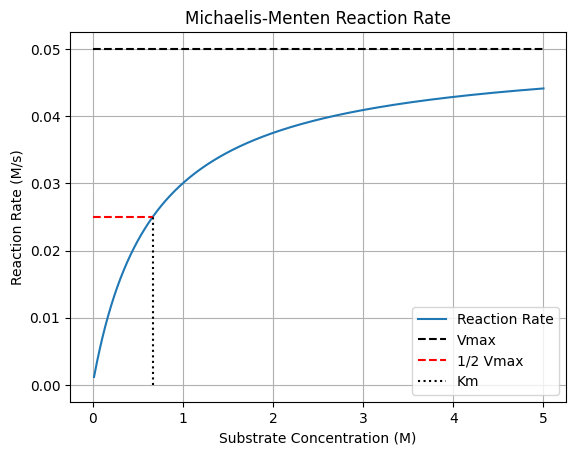

In [213]:
plt.figure()
plt.plot(concS, V, label="Reaction Rate")
plt.hlines(Vmax, 0, S, label="Vmax", ls="--", color="black")
plt.hlines(0.5*Vmax, 0, Km, label="1/2 Vmax", ls="--", color="red")
plt.vlines(Km, 0, 0.5*Vmax, label="Km", ls=":", color="black")
plt.title("Michaelis-Menten Reaction Rate")
plt.ylabel("Reaction Rate (M/s)")
plt.xlabel("Substrate Concentration (M)")
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Biomagnification

## P-C1-C2 Mercury Model

Consider a small, aquatic ecosystem containing one primary producer (algae), one first-order consumer (a small fish species which eats the algae), and one second-order consumer (a large fish species which eats only the small fish). If some contaminant such as mercury (or microplastic waste) is introduced in the water and diffuses to an approximately uniform and constant concentration $C_{w}$, the algae will uptake it directly from the water, then the small fish will uptake it by consuming algae, and finally the big fish will uptake it by consuming small fish. This will lead to the magnification of mercury concentration at ascending trophic levels, with the big fish accumulating the largest concentration over time.

To model biomagnification dynamics, we need many parameters. Rate constants include the following:
*   $J_{w}^{(in)}$: constant external input flux of mercury into the water. $[\text{ng}/\text{L}/\text{day}]$
*   $k_{w}^{(out)}$: first-order rate constant for outflow of mercury into the surrounding environment. $[\text{day}^{-1}]$
*   $k_{a}^{(in)}$: first-order rate constant for mercury uptake from water by algae. $[\text{L}/\text{kg algae}/\text{day}]$
*   $k_{a}^{(out)}$: first-order rate constant for mercury elimination by algae. $[\text{day}^{-1}]$
*   $k_{sf}^{(in)}$: first-order rate constant for mercury uptake from algae by small fish. $[\text{kg algae}/\text{kg small fish}/\text{day}]$
*   $k_{sf}^{(out)}$: first-order rate constant for mercury excretion by small fish. $[\text{day}^{-1}]$
*   $k_{bf}^{(in)}$: first-order rate constant for mercury uptake from small fish by big fish. $[\text{kg small fish}/\text{kg big fish}/\text{day}]$
*   $k_{bf}^{(out)}$: first-order rate constant for mercury excretion by big fish. $[\text{day}^{-1}]$

The compartments among which mercury flows are concentrations $C_{w}$, $C_{a}$, $C_{sf}$, and $C_{bf}$. $C_{w}$ has units of $[\text{ng}/\text{L}]$, whereas the other quantities have units of $[\text{ng}/\text{kg biomass}]$.

The dynamical system consists of the following coupled differential equations:

$$\frac{dC_{w}}{dt} = J_{w} - k_{w}^{(out)}C_{w}$$

$$\frac{dC_{a}}{dt} = k_{a}^{(in)}C_{w} - k_{a}^{(out)}C_{a}$$

$$\frac{dC_{sf}}{dt} = k_{sf}^{(in)}C_{a} - k_{sf}^{(out)}C_{sf}$$

$$\frac{dC_{bf}}{dt} = k_{bf}^{(in)}C_{sf} - k_{bf}^{(out)}C_{bf}$$

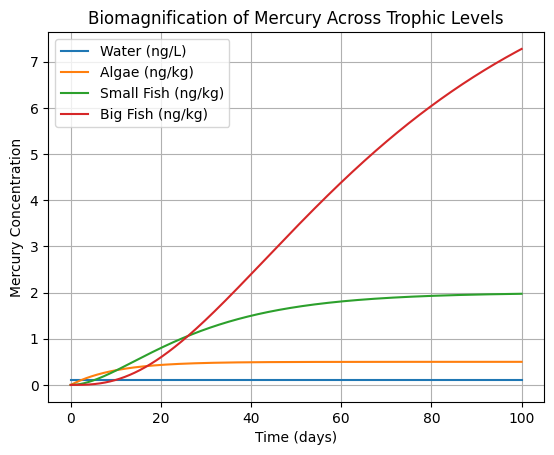

In [231]:
C_w = 0.1 # ng/L
C_a = 0.0 # ng/kg wet weight
C_sf = 0.0 # ng/kg wet weight
C_bf = 0.0 # ng/kg wet weight

J_w = 0.001 # ng/L/day
k_out_w = 0.01 # 1/day
k_in_a = 0.5 # L/(kg_algae*day)
k_out_a = 0.1 # 1/day
k_in_sf = 0.2 # kg_algae/(kg_sf*day)
k_out_sf = 0.05 # 1/day
k_in_bf = 0.1 # kg_sf/(kg_bf*day)
k_out_bf = 0.02 # 1/day

def biomagnification(C_w, C_a, C_sf, C_bf, J_w, k_out_w, k_in_a, k_out_a, k_in_sf, k_out_sf, k_in_bf, k_out_bf, dt, T):
    nsteps = int(T / dt)
    t = 0
    times = [t]
    conc = {"water": [C_w], "algae": [C_a], "smallfish": [C_sf], "bigfish": [C_bf]}
    rate = {"water": [], "algae": [], "smallfish": [], "bigfish": []}
    for i in range(nsteps):
        dCwdt = J_w - k_out_w * C_w
        dCadt = k_in_a * C_w - k_out_a * C_a
        dCsfdt = k_in_sf * C_a - k_out_sf * C_sf
        dCbfdt = k_in_bf * C_sf - k_out_bf * C_bf
        C_w += dCwdt * dt
        C_a += dCadt * dt
        C_sf += dCsfdt * dt
        C_bf += dCbfdt * dt
        # lower limit (no negative concentrations)
        C_w = max(0, C_w)
        C_a = max(0, C_a)
        C_sf = max(0, C_sf)
        C_bf = max(0, C_bf)
        t += dt
        times.append(t)
        conc["water"].append(C_w)
        conc["algae"].append(C_a)
        conc["smallfish"].append(C_sf)
        conc["bigfish"].append(C_bf)
        rate["water"].append(dCwdt)
        rate["algae"].append(dCadt)
        rate["smallfish"].append(dCsfdt)
        rate["bigfish"].append(dCbfdt)
    dCwdt = J_w - k_out_w * C_w
    dCadt = k_in_a * C_w - k_out_a * C_a
    dCsfdt = k_in_sf * C_a - k_out_sf * C_sf
    dCbfdt = k_in_bf * C_sf - k_out_bf * C_bf
    rate["water"].append(dCwdt)
    rate["algae"].append(dCadt)
    rate["smallfish"].append(dCsfdt)
    rate["bigfish"].append(dCbfdt)
    return times, conc, rate

times, conc, rate = biomagnification(C_w, C_a, C_sf, C_bf, J_w, k_out_w, k_in_a, k_out_a, k_in_sf, k_out_sf, k_in_bf, k_out_bf, dt, T)

concw, conca, concsf, concbf = list(conc.values())
ratew, ratea, ratesf, ratebf = list(rate.values())

plt.figure()
plt.plot(times, concw, label="Water (ng/L)")
plt.plot(times, conca, label="Algae (ng/kg)")
plt.plot(times, concsf, label="Small Fish (ng/kg)")
plt.plot(times, concbf, label="Big Fish (ng/kg)")
plt.xlabel("Time (days)")
plt.ylabel("Mercury Concentration")
plt.title("Biomagnification of Mercury Across Trophic Levels")
plt.legend()
plt.grid()
plt.show()

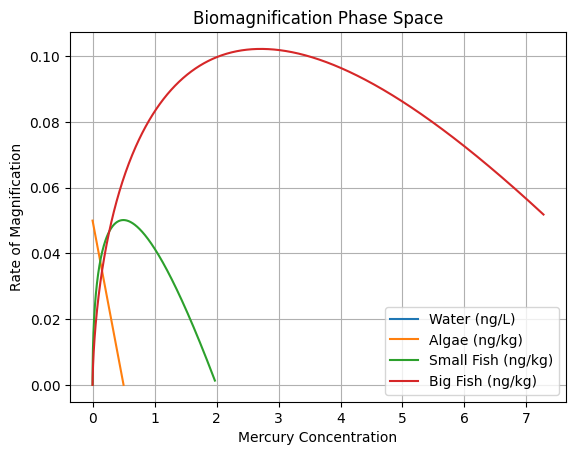

In [235]:
plt.figure()
plt.plot(concw, ratew, label="Water (ng/L)")
plt.plot(conca, ratea, label="Algae (ng/kg)")
plt.plot(concsf, ratesf, label="Small Fish (ng/kg)")
plt.plot(concbf, ratebf, label="Big Fish (ng/kg)")
plt.xlabel("Mercury Concentration")
plt.ylabel("Rate of Magnification")
plt.title("Biomagnification Phase Space")
plt.legend()
plt.grid()
plt.show()

If you eat fish, which species would you prefer to eat?

## Elevating Contamination

With a constant level of environmental contamination, the rate of biomagnification eventually saturates. However, anthropogenic industrial waste has been spilling into ecosystems worldwide at an increasing rate for many decades as the scale of economic production expands. If the contaminant inflow rate increases linearly over time, we see far more troubling dynamics.

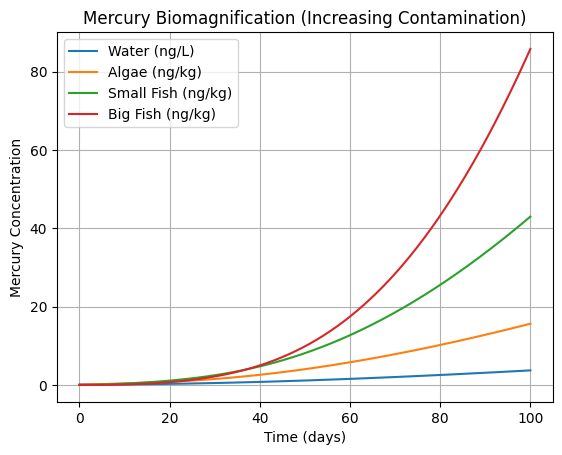

In [246]:
C_w = 0.1 # ng/L
C_a = 0.0 # ng/kg wet weight (changed from 1.0)
C_sf = 0.0 # ng/kg wet weight (changed from 10.0)
C_bf = 0.0 # ng/kg wet weight (changed from 100.0)

J_w = 0.001 # ng/L/day^2
k_out_w = 0.01 # 1/day
k_in_a = 0.5 # L/(kg_algae*day)
k_out_a = 0.1 # 1/day
k_in_sf = 0.2 # kg_algae/(kg_sf*day)
k_out_sf = 0.05 # 1/day
k_in_bf = 0.1 # kg_sf/(kg_bf*day)
k_out_bf = 0.02 # 1/day

def biomagnification(C_w, C_a, C_sf, C_bf, J_w, k_out_w, k_in_a, k_out_a, k_in_sf, k_out_sf, k_in_bf, k_out_bf, dt, T):
    nsteps = int(T / dt)
    t = 0
    times = [t]
    conc = {"water": [C_w], "algae": [C_a], "smallfish": [C_sf], "bigfish": [C_bf]}
    rate = {"water": [], "algae": [], "smallfish": [], "bigfish": []}
    for i in range(nsteps):
        dCwdt = J_w * t - k_out_w * C_w
        dCadt = k_in_a * C_w - k_out_a * C_a
        dCsfdt = k_in_sf * C_a - k_out_sf * C_sf
        dCbfdt = k_in_bf * C_sf - k_out_bf * C_bf
        C_w += dCwdt * dt
        C_a += dCadt * dt
        C_sf += dCsfdt * dt
        C_bf += dCbfdt * dt
        # lower limit (no negative concentrations)
        C_w = max(0, C_w)
        C_a = max(0, C_a)
        C_sf = max(0, C_sf)
        C_bf = max(0, C_bf)
        t += dt
        times.append(t)
        conc["water"].append(C_w)
        conc["algae"].append(C_a)
        conc["smallfish"].append(C_sf)
        conc["bigfish"].append(C_bf)
        rate["water"].append(dCwdt)
        rate["algae"].append(dCadt)
        rate["smallfish"].append(dCsfdt)
        rate["bigfish"].append(dCbfdt)
    dCwdt = J_w * t - k_out_w * C_w
    dCadt = k_in_a * C_w - k_out_a * C_a
    dCsfdt = k_in_sf * C_a - k_out_sf * C_sf
    dCbfdt = k_in_bf * C_sf - k_out_bf * C_bf
    rate["water"].append(dCwdt)
    rate["algae"].append(dCadt)
    rate["smallfish"].append(dCsfdt)
    rate["bigfish"].append(dCbfdt)
    return times, conc, rate

times, conc, rate = biomagnification(C_w, C_a, C_sf, C_bf, J_w, k_out_w, k_in_a, k_out_a, k_in_sf, k_out_sf, k_in_bf, k_out_bf, dt, T)

concw, conca, concsf, concbf = list(conc.values())
ratew, ratea, ratesf, ratebf = list(rate.values())

plt.figure()
plt.plot(times, concw, label="Water (ng/L)")
plt.plot(times, conca, label="Algae (ng/kg)")
plt.plot(times, concsf, label="Small Fish (ng/kg)")
plt.plot(times, concbf, label="Big Fish (ng/kg)")
plt.xlabel("Time (days)")
plt.ylabel("Mercury Concentration")
plt.title("Mercury Biomagnification (Increasing Contamination)")
plt.legend()
plt.grid()
plt.show()

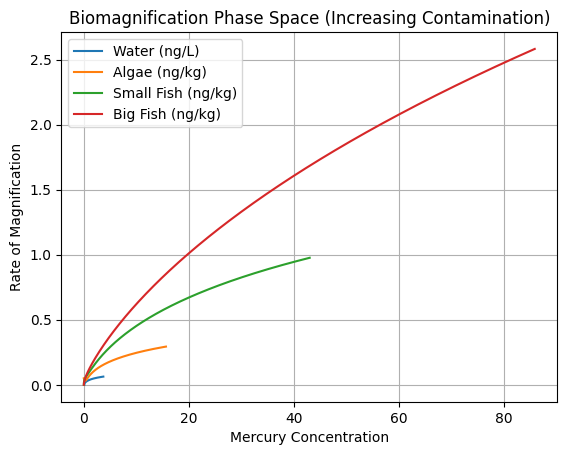

In [247]:
plt.figure()
plt.plot(concw, ratew, label="Water (ng/L)")
plt.plot(conca, ratea, label="Algae (ng/kg)")
plt.plot(concsf, ratesf, label="Small Fish (ng/kg)")
plt.plot(concbf, ratebf, label="Big Fish (ng/kg)")
plt.xlabel("Mercury Concentration")
plt.ylabel("Rate of Magnification")
plt.title("Biomagnification Phase Space (Increasing Contamination)")
plt.legend()
plt.grid()
plt.show()

# Epidemiology

Not all contaminants accumulate passively. Viruses, for example, can be introduced in small numbers into a host organism and then rapidly multiply by hijacking the natural cellular reproductive cycle. This gradually causes an infection as the host's immune system attempts to remove the virus. Viruses have evolved to utilize various physiological responses to the infection, such as coughing and sneezing, to exit their host and spead to other susceptible targets.

## SIR Model

The most common models for disease spreading dynamics are compartmental models, much like the biomagnification model we just implemented. A fundamental starting point is the <b>SIR (susceptible-infectious-recovered)</b> model, which breaks a whole fixed-size population down into three compartments. The infected compartment starts with one or more individuals capable of spreading the pathogen, and then swells in proportion to the spreading rate and the size of the susceptible population. At the same time, individuals are removed from the infected population at some rate either by returning to a healthy state or, in some models, by dying. Once removed from the infected population, it is assumed that these individuals cannot be re-infected: they are <i>immune</i>. The simplest case prescribes the following coupled differential equations:

$$N = S + I + R$$

$$\frac{dS}{dt} = -\frac{\beta}{N}IS$$

$$\frac{dI}{dt} = \frac{\beta}{N}IS - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

Here, $\beta$ is the average number of pathogenic (infection-causing) contacts per infectious individual, per susceptible individual, per unit time. $\gamma$ is the recovery rate. The ratio of these two numbers is called the **basic reproduction number**, $R_{0}$, and is often used to characterize the severity of epidemics.

$$R_{0} = \frac{\beta}{\gamma}$$

This number also arises with the solution of the system. Divide the first equation by the third:

$$\frac{dS}{dt} \frac{dt}{dR} = \frac{dS}{dR} = -\frac{\beta}{\gamma N} S = -\frac{R_{0}}{N} S$$

$$\int \frac{dS}{S} = - \int \frac{R_{0}}{N} dR$$

$$S(t) = S_{0} e^{-\frac{R_{0}}{N} ( R(t) - R_{0} )}$$

Then, rewriting the equation for the infectious population, we see the importance of $R_{0}$.

$$\frac{dI}{dt} = \Bigl( R_{0}\frac{S}{N} - 1\Bigr) \gamma I$$

Specifically, if $R_{0}S_{0} < N$, then the infectious population is initially decreasing ($\frac{dI}{dt}(0) < 0$), so, regardless of the overall size of the whole population, the disease will be unable to evolve into an epidemic.

On the other hand, if $R_{0}S_{0} > N$, then there will be an epidemic outbreak, and depending on how large the basic reproduction number is, the disease may infect a large fraction of the population.

In [274]:
S = 999
I = 1
R = 0
N = S + I + R
beta = 5.0
gamma = 1.0
print(f"The initial susceptible fraction is {S/N}, and the basic reproduction number is {beta/gamma}.\nWill there be an epidemic?")

The initial susceptible fraction is 0.999, and the basic reproduction number is 5.0.
Will there be an epidemic?


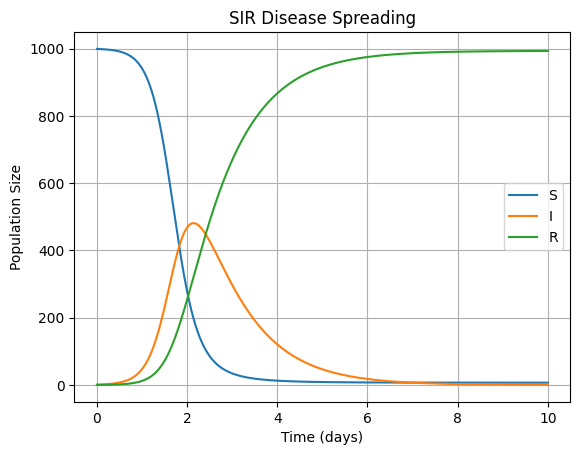

In [282]:
def SIR(S, I, R, beta, gamma, dt, T):
    N = S + I + R
    nsteps = int(T / dt)
    pops = {"S": [S], "I": [I], "R": [R]}
    rates = {"S": [], "I": [], "R": []}
    t = 0
    times = [t]
    for i in range(nsteps):
        dSdt = -beta*I*S/N
        dIdt = beta*I*S/N - gamma*I
        dRdt = gamma*I
        S += dSdt * dt
        I += dIdt * dt
        R += dRdt * dt
        t += dt
        times.append(t)
        pops["S"].append(S)
        pops["I"].append(I)
        pops["R"].append(R)
        rates["S"].append(dSdt)
        rates["I"].append(dIdt)
        rates["R"].append(dRdt)
    dSdt = -beta*I*S/N
    dIdt = beta*I*S/N - gamma*I
    dRdt = gamma*I
    rates["S"].append(dSdt)
    rates["I"].append(dIdt)
    rates["R"].append(dRdt)
    return times, pops, rates

plt.figure()
times, pops, rates = SIR(S, I, R, beta, gamma, dt/10, T/10)
pS, pI, pR = list(pops.values())
rS, rI, rR = list(rates.values())
plt.plot(times, pS, label="S")
plt.plot(times, pI, label="I")
plt.plot(times, pR, label="R")
plt.xlabel("Time (days)")
plt.ylabel("Population Size")
plt.title("SIR Disease Spreading")
plt.grid()
plt.legend()
plt.show()

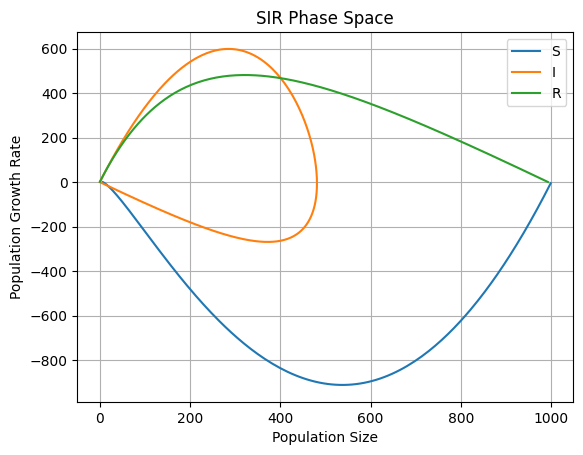

In [283]:
plt.figure()
plt.plot(pS, rS, label="S")
plt.plot(pI, rI, label="I")
plt.plot(pR, rR, label="R")
plt.xlabel("Population Size")
plt.ylabel("Population Growth Rate")
plt.title("SIR Phase Space")
plt.grid()
plt.legend()
plt.show()

## SIR + Birth-Death

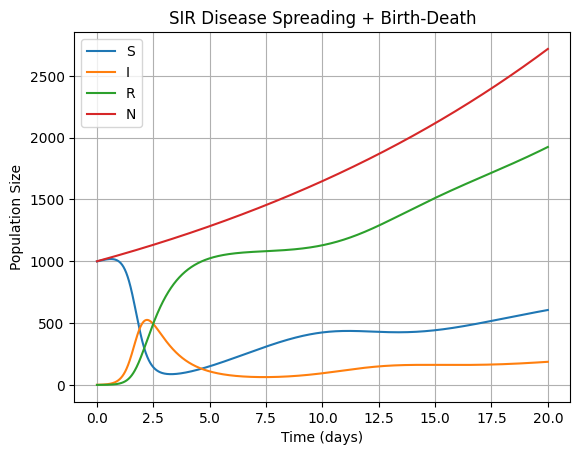

In [345]:
def SIRbirthdeath(S, I, R, beta, gamma, b, d, dt, T):
    N = S + I + R
    nsteps = int(T / dt)
    pops = {"S": [S], "I": [I], "R": [R], "N": [N]}
    rates = {"S": [], "I": [], "R": [], "N": []}
    t = 0
    times = [t]
    for i in range(nsteps):
        dSdt = -beta*I*S/N + b*N - d*S
        dIdt = beta*I*S/N - gamma*I - d*I
        dRdt = gamma*I - d*R
        dNdt = dSdt + dIdt + dRdt
        S += dSdt * dt
        I += dIdt * dt
        R += dRdt * dt
        N = S + I + R
        t += dt
        times.append(t)
        pops["S"].append(S)
        pops["I"].append(I)
        pops["R"].append(R)
        pops["N"].append(N)
        rates["S"].append(dSdt)
        rates["I"].append(dIdt)
        rates["R"].append(dRdt)
        rates["N"].append(dNdt)
    dSdt = -beta*I*S/N + b*N - d*S
    dIdt = beta*I*S/N - gamma*I - d*I
    dRdt = gamma*I - d*R
    dNdt = dSdt + dIdt + dRdt
    rates["S"].append(dSdt)
    rates["I"].append(dIdt)
    rates["R"].append(dRdt)
    rates["N"].append(dNdt)
    return times, pops, rates

b = 0.1
d = 0.05

plt.figure()
times, pops, rates = SIRbirthdeath(S, I, R, beta, gamma, b, d, dt/10, T/5)
pS, pI, pR, pN = list(pops.values())
rS, rI, rR, rN = list(rates.values())
plt.plot(times, pS, label="S")
plt.plot(times, pI, label="I")
plt.plot(times, pR, label="R")
plt.plot(times, pN, label="N")
plt.xlabel("Time (days)")
plt.ylabel("Population Size")
plt.title("SIR Disease Spreading + Birth-Death")
plt.grid()
plt.legend()
plt.show()

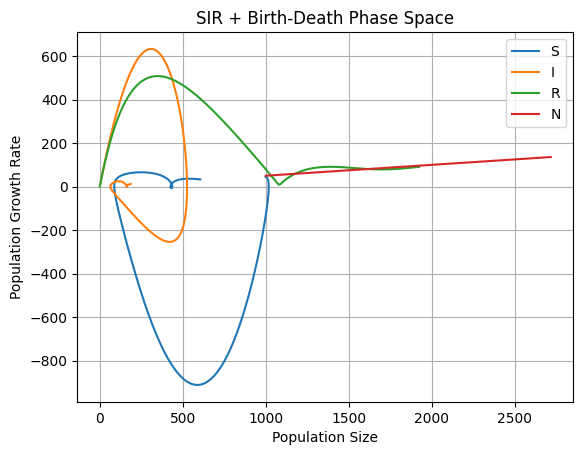

In [346]:
plt.figure()
plt.plot(pS, rS, label="S")
plt.plot(pI, rI, label="I")
plt.plot(pR, rR, label="R")
plt.plot(pN, rN, label="N")
plt.xlabel("Population Size")
plt.ylabel("Population Growth Rate")
plt.title("SIR + Birth-Death Phase Space")
plt.grid()
plt.legend()
plt.show()

## Epidemic Data Analysis

Epidemiologists can fit models to real data (for, e.g., influenza or covid epidemics) to determine the basic reproduction numbers and other useful parameters for different pathogens.